# Data Analysis with Python
In this lesson we will learn about NumPy, Pandas and matplotlib

### Print() funcrion 

```
print('I love python')
```



In [253]:
# pip install wordcloud
# %pip install textblob


In [254]:
'''
Importing the most common data related packages

'''
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from textblob import TextBlob
import scipy
import sklearn
from pprint import pprint

In [255]:
# Fetching data from API using requests 
def fetch_data(url):
    import requests
    response = requests.get(url)
    data = response.json()
    return data

In [256]:
# fetch countries from countries API and transform to a json file with name, capital and popularion
url = 'https://restcountries.com/v3.1/all'
countries = fetch_data(url)
print(len(countries))

250


### Cats' Life span

In [257]:

url = 'https://api.thecatapi.com/v1/breeds'
data = fetch_data(url)
years = []
for cat in data:
    mn,mx = cat['life_span'].split(' - ')
    average = (int(mn) + int(mx)) / 2
    years.append(average)
total_average = sum(years) / len(years)
print(total_average)
    

13.746268656716419


In [258]:
# What is the average of cats

### Word cloud

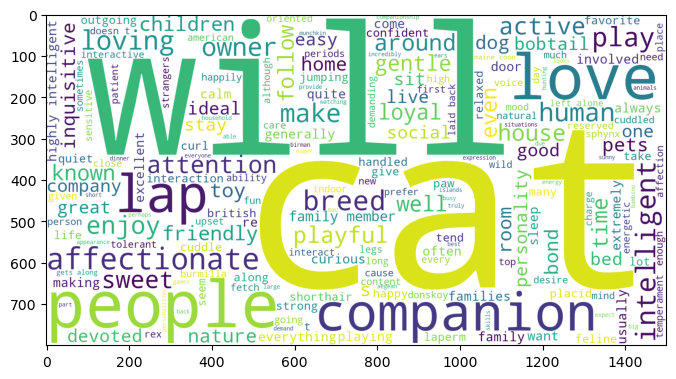

In [259]:
txt = ''
for cat in data:
    description = cat['description']
    txt +=' ' + description


# pattern = r'[^A-Za-z0-9]+'
pattern = r'\W+'
cleaned_txt = re.sub(pattern, ' ',  txt).lower()
# words = cleaned_txt.split()
# print(words)
# print(cleaned_txt)
# print(STOPWORDS)

wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(cleaned_txt)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
plt.savefig('./cat_word_cloud.png')
plt.show()


In [260]:
# What are the ten most frequent words in the cats descriptions

In [261]:
def create_frequency_table(txt):
    words = txt.split()
    frequency_table = {}
    for word in words:
        if word in frequency_table:
            frequency_table[word] = frequency_table[word] + 1
        else:
            frequency_table[word] = 1
    items = frequency_table.items()
    sorted_items = sorted(items, key = lambda item:item[1], reverse = True)
    ten_most_words = sorted_items [:10]
    return sorted_items, ten_most_words



In [262]:
freq_table, ten_most_words = create_frequency_table(cleaned_txt)

In [263]:
ten_most_words

[('and', 178),
 ('the', 137),
 ('to', 121),
 ('a', 90),
 ('is', 78),
 ('they', 74),
 ('with', 64),
 ('are', 61),
 ('of', 59),
 ('their', 53)]

In [264]:
words = cleaned_txt.split()
unique_words = set(words)
total_number_words = len(words)
unique_number_words = len(unique_words)
print(total_number_words, unique_number_words)
word_variety = unique_number_words / total_number_words
print(word_variety)

3419 927
0.2711319099151799


In [265]:
freq_table, ten_most_words = create_frequency_table(cleaned_txt)

In [266]:
words = []
frequency = []
for key,value in freq_table:
    words.append(key)
    frequency.append(value)
# print(words)
# print(frequency)

In [267]:
years

[14.5,
 10.5,
 13.0,
 14.0,
 16.0,
 16.0,
 13.0,
 14.0,
 12.5,
 13.0,
 13.5,
 14.5,
 14.0,
 13.0,
 14.5,
 15.5,
 12.5,
 12.0,
 15.0,
 13.5,
 13.0,
 13.0,
 14.0,
 12.5,
 11.0,
 13.5,
 12.5,
 13.5,
 13.5,
 19.0,
 12.5,
 13.5,
 12.5,
 12.0,
 15.0,
 11.0,
 11.0,
 12.5,
 17.5,
 12.5,
 13.5,
 15.0,
 13.0,
 12.5,
 13.5,
 14.0,
 13.0,
 13.0,
 14.5,
 14.5,
 14.0,
 14.5,
 13.0,
 18.5,
 12.5,
 14.5,
 13.5,
 13.5,
 13.5,
 16.5,
 14.0,
 13.0,
 15.0,
 13.5,
 16.5,
 14.5,
 14.0]

In [268]:
arr = np.array(years)
arr.mean()

13.746268656716419

In [269]:
arr.std()

1.5725564658451314

In [270]:
arr.var()

2.47293383827133

In [271]:
arr.min()

10.5

In [272]:
arr.max()


19.0

In [273]:
arr.sum()


921.0

In [274]:
nums = list(range(10))

In [275]:
nums

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [276]:
x = np.arange(-10, 11)
y = x ** 2
print(x)
print(y)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[100  81  64  49  36  25  16   9   4   1   0   1   4   9  16  25  36  49
  64  81 100]


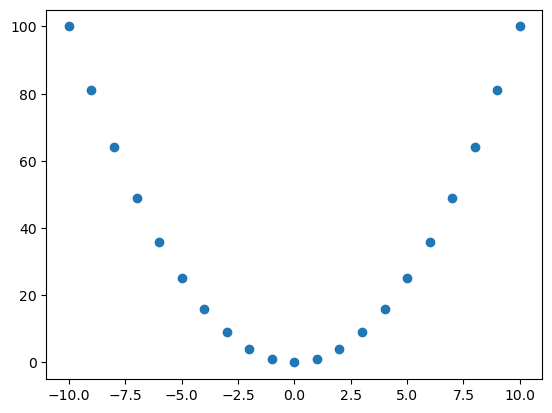

In [277]:
plt.scatter(x, y)

In [278]:
x = np.linspace(0, 10, 200)

In [279]:
y = x * 2

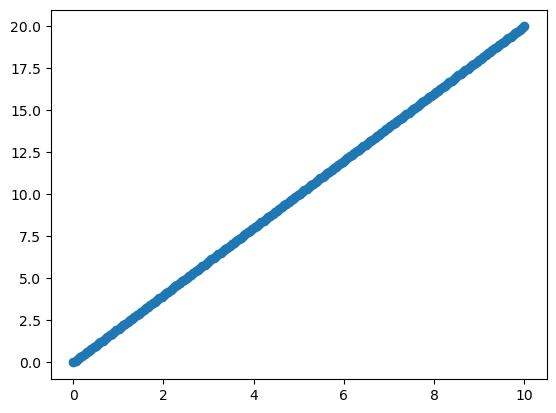

In [280]:
plt.scatter(x, y)
plt.show()

In [281]:
x = np.arange(len(frequency))
y = np.array(frequency)


Text(0, 0.5, 'Word frequency')

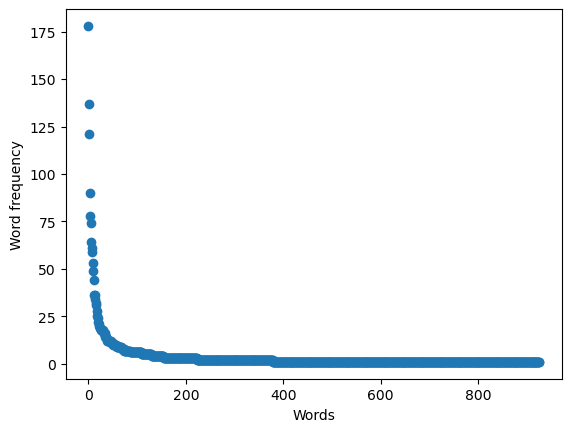

In [282]:
plt.scatter(x, y)
plt.xlabel('Words')
plt.ylabel('Word frequency')

In [283]:
cat_breeds = {}
for cat in data:
    origin = cat['origin']
    if origin in cat_breeds:
        cat_breeds[origin] +=  1
    else:
        cat_breeds[origin] = 1
items = cat_breeds.items()
sorted_items = sorted(items, key = lambda item: item[1], reverse = True)
print(sorted_items)

origins = [item[0] for item in sorted_items if item[1] > 1]
breeds = [item[1] for item in sorted_items if item[1] > 1]
print(origins)
print(breeds)

[('United States', 28), ('United Kingdom', 8), ('Russia', 4), ('Thailand', 4), ('Egypt', 3), ('Canada', 3), ('France', 2), ('Burma', 2), ('Turkey', 2), ('Greece', 1), ('United Arab Emirates', 1), ('Australia', 1), ('Cyprus', 1), ('China', 1), ('Japan', 1), ('Isle of Man', 1), ('Norway', 1), ('Iran (Persia)', 1), ('Singapore', 1), ('Somalia', 1)]
['United States', 'United Kingdom', 'Russia', 'Thailand', 'Egypt', 'Canada', 'France', 'Burma', 'Turkey']
[28, 8, 4, 4, 3, 3, 2, 2, 2]


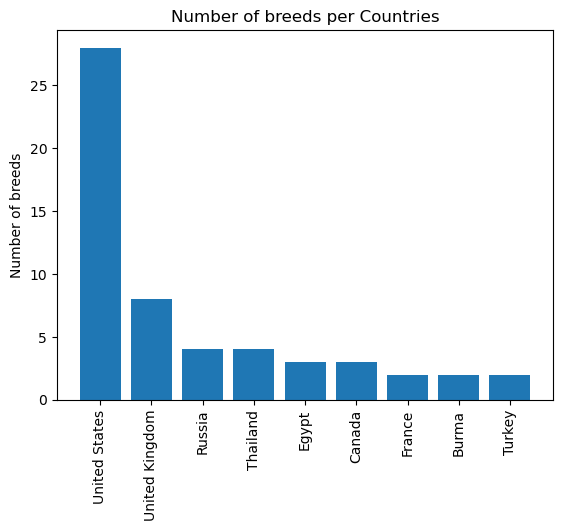

In [284]:
plt.bar(origins, breeds)
plt.xticks(rotation=90)
# plt.xlabel('Origins of Cats')
plt.ylabel('Number of breeds')
plt.title('Number of breeds per Countries')
plt.savefig('cats_breed_and_origin.png')
plt.show()

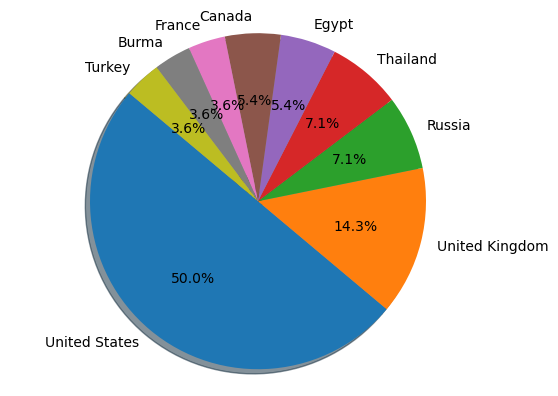

In [285]:

plt.pie(breeds, labels=origins, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

 ## Sentiment Analysis

In [308]:
testimonial = TextBlob("I love it")

In [309]:
testimonial.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)